In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("Mobiles Dataset (2025).csv",encoding='latin1')
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [3]:
df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')

In [4]:
df = df.drop([ "Launched Price (Pakistan)" , "Launched Price (India)","Launched Price (China)","Launched Price (Dubai)"],axis =1)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,USD 799,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,USD 849,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,USD 899,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,USD 899,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,USD 949,2024


In [5]:
df.isnull().sum()

Company Name            0
Model Name              0
Mobile Weight           0
RAM                     0
Front Camera            0
Back Camera             0
Processor               0
Battery Capacity        0
Screen Size             0
Launched Price (USA)    0
Launched Year           0
dtype: int64

In [6]:
df.duplicated().sum()

15

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company Name          930 non-null    object
 1   Model Name            930 non-null    object
 2   Mobile Weight         930 non-null    object
 3   RAM                   930 non-null    object
 4   Front Camera          930 non-null    object
 5   Back Camera           930 non-null    object
 6   Processor             930 non-null    object
 7   Battery Capacity      930 non-null    object
 8   Screen Size           930 non-null    object
 9   Launched Price (USA)  930 non-null    object
 10  Launched Year         930 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 80.1+ KB


In [18]:
df["Screen Size"].value_counts().head(20)

Screen Size
7     539
6     258
8      28
10     27
12     25
11     22
13     15
5       9
9       4
15      2
14      1
Name: count, dtype: int64

In [26]:
df["Battery Capacity"].value_counts().tail(20)

Battery Capacity
4040     1
4805     1
2000     1
4030     1
3055     1
2300     1
3315     1
5700     1
3350     1
11000    1
4085     1
4360     1
4460     1
4115     1
7600     1
8200     1
2800     1
3140     1
5600     1
5065     1
Name: count, dtype: int64

In [25]:
df["Processor"].value_counts().tail(20)

Processor
Dimensity 1100             1
Snapdragon 617             1
Kirin 990E 5G              1
Kirin 9000 5G              1
Exynos 7570                1
Snapdragon 425             1
Exynos 7870                1
Snapdragon 450             1
Snapdragon 480+            1
Snapdragon 626             1
Snapdragon 730G            1
Qualcomm Snapdragon 480    1
MediaTek Helio P22         1
MediaTek G99               1
Snapdragon 615             1
Snapdragon 439             1
Snapdragon 652             1
MediaTek Helio G35         1
MediaTek MT6592            1
MediaTek Dimensity 8400    1
Name: count, dtype: int64

In [17]:
import math

# Extract numeric price
df["Launched Price (USA)"] = (
    df["Launched Price (USA)"]
    .str.replace("USD", "")  # Remove "USD"
    .str.replace(",", "")    # Remove commas
    .str.strip()             # Remove leading/trailing spaces
    .astype(float)           # Convert to float
    .round()                 # Round to the nearest integer
    .astype(int)             # Convert to integer
)


df["Mobile Weight"] = df["Mobile Weight"].str.replace("g", "").astype("float32").round().astype("int32")

def extract_max_ram(ram_str):
    parts = ram_str.replace("GB", "").split("/")
    return math.floor(max(float(part.strip()) for part in parts))
df["RAM"] = df["RAM"].apply(extract_max_ram)

def extract_camera_mp(camera_str):
    camera_str = str(camera_str)
    mp_values = re.findall(r"(\d+\.?\d*)", camera_str)
    return round(sum(float(mp) for mp in mp_values))
df["Front Camera"] = df["Front Camera"].apply(extract_camera_mp)
df["Back Camera"] = df["Back Camera"].apply(extract_camera_mp)

df["Battery Capacity"] = df["Battery Capacity"].str.replace(",", "").str.replace("mAh", "").astype("float32").round().astype("int32")

def extract_screen_size(screen_str):
    match = re.search(r"(\d+\.?\d*)", screen_str)
    if match:
        return round(float(match.group(1)))
    else:
        return 0
df["Screen Size"] = df["Screen Size"].apply(extract_screen_size)
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,Apple,iPhone 16 128GB,174,6,12,48,A17 Bionic,3600,6,799,2024
1,Apple,iPhone 16 256GB,174,6,12,48,A17 Bionic,3600,6,849,2024
2,Apple,iPhone 16 512GB,174,6,12,48,A17 Bionic,3600,6,899,2024
3,Apple,iPhone 16 Plus 128GB,203,6,12,48,A17 Bionic,4200,7,899,2024
4,Apple,iPhone 16 Plus 256GB,203,6,12,48,A17 Bionic,4200,7,949,2024


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company Name          930 non-null    object
 1   Model Name            930 non-null    object
 2   Mobile Weight         930 non-null    int32 
 3   RAM                   930 non-null    int64 
 4   Front Camera          930 non-null    int64 
 5   Back Camera           930 non-null    int64 
 6   Processor             930 non-null    object
 7   Battery Capacity      930 non-null    int32 
 8   Screen Size           930 non-null    int64 
 9   Launched Price (USA)  930 non-null    int32 
 10  Launched Year         930 non-null    int64 
dtypes: int32(3), int64(5), object(3)
memory usage: 69.2+ KB


In [11]:
object=df.select_dtypes(include='object')
numric=df.select_dtypes(exclude='object')

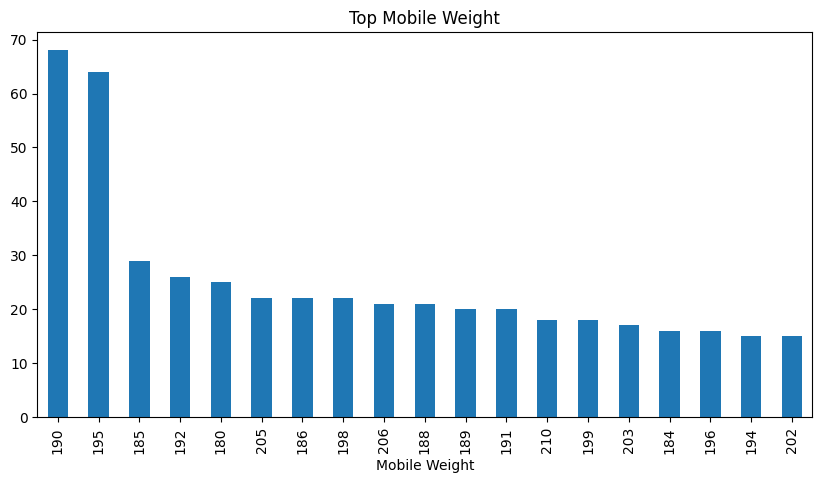

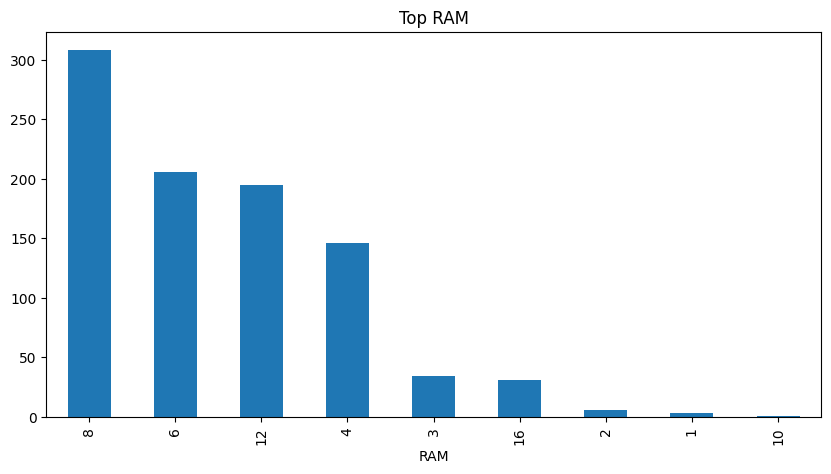

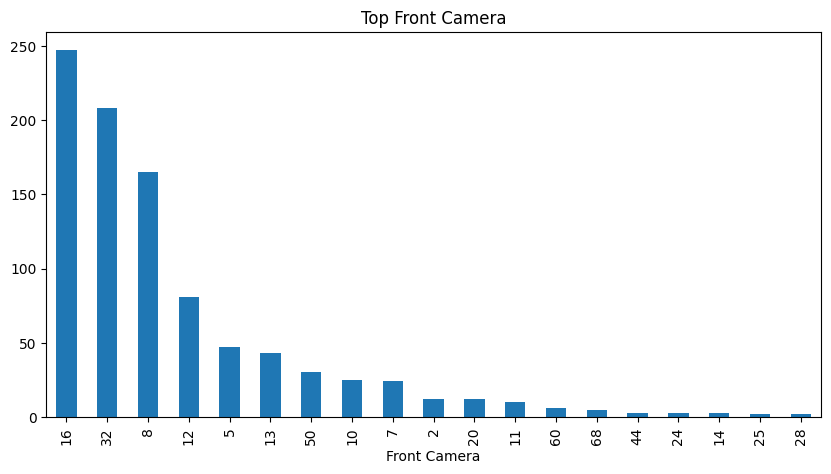

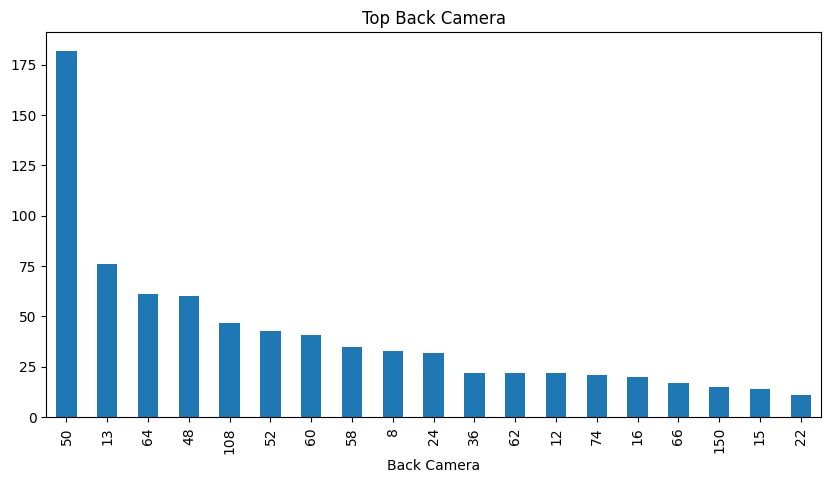

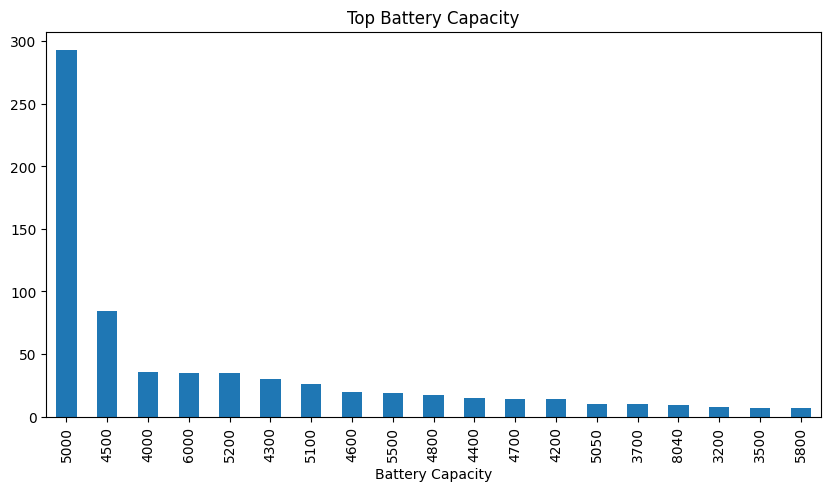

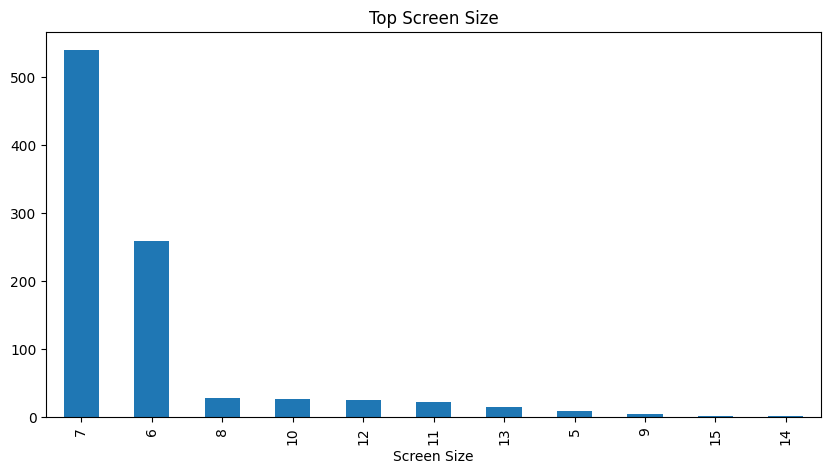

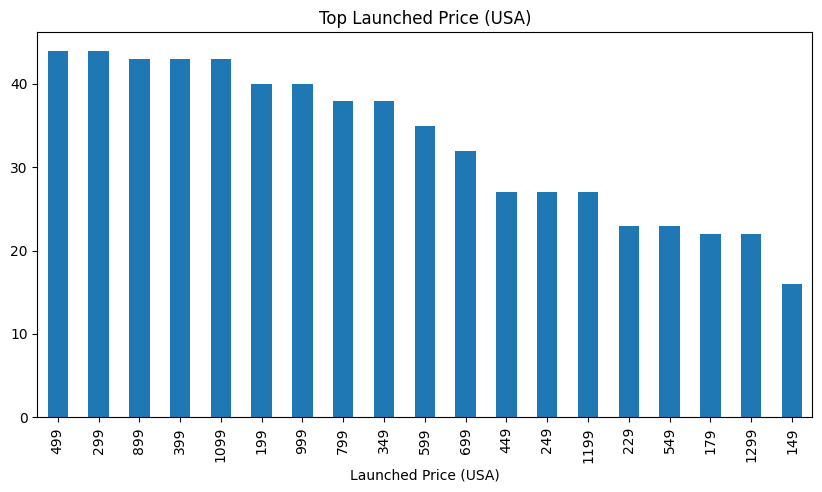

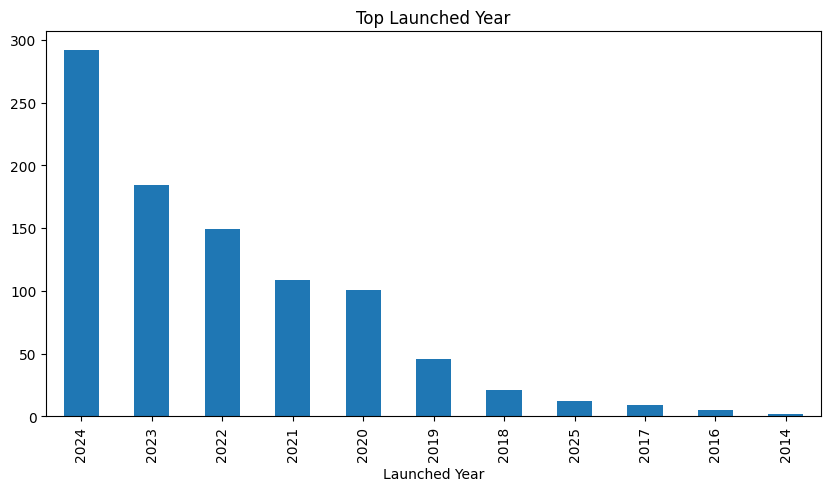

In [12]:
for i in numric:
    plt.figure(figsize=(10,5))
    top20=df[i].value_counts()[0:19]
    top20.plot(kind='bar')
    plt.title('Top'+" "+i)
    plt.show()

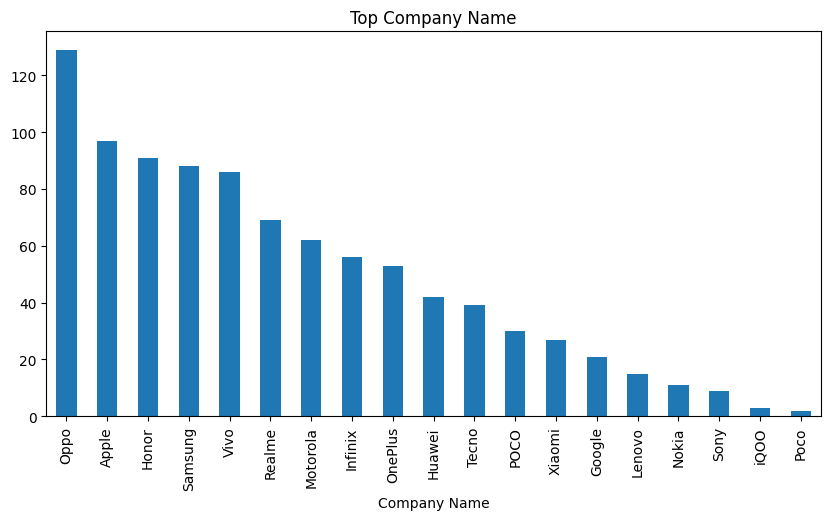

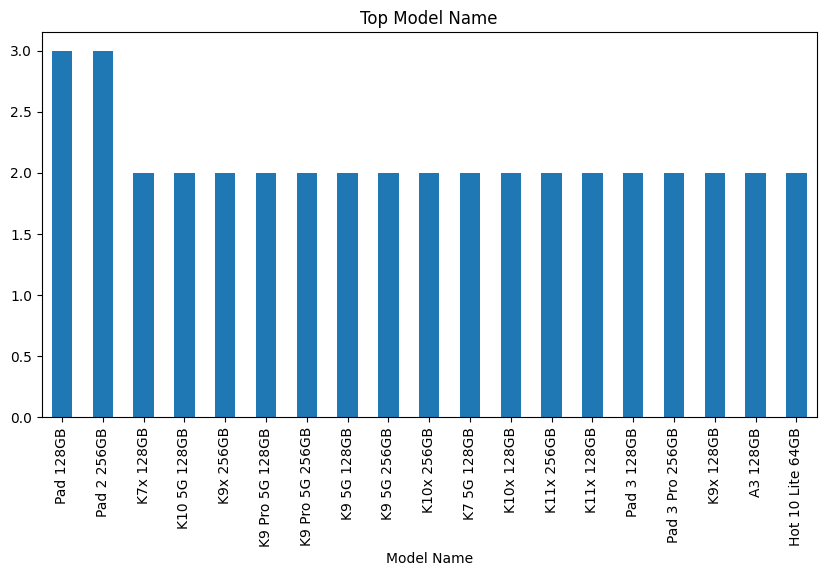

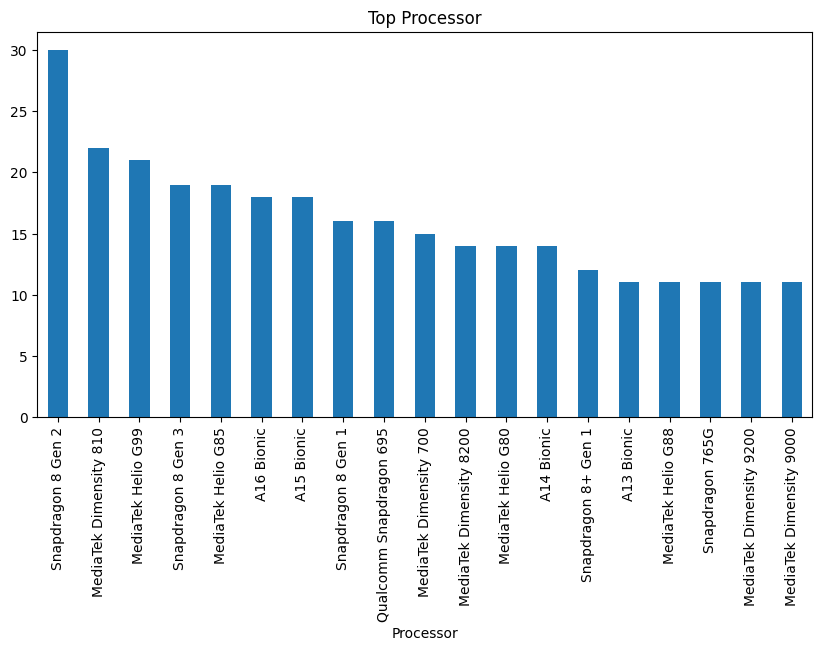

In [13]:
for i in object:
    plt.figure(figsize=(10,5))
    top20=df[i].value_counts()[0:19]
    top20.plot(kind='bar')
    plt.title('Top'+" "+i)
    plt.show()

In [14]:
df = df.drop_duplicates()

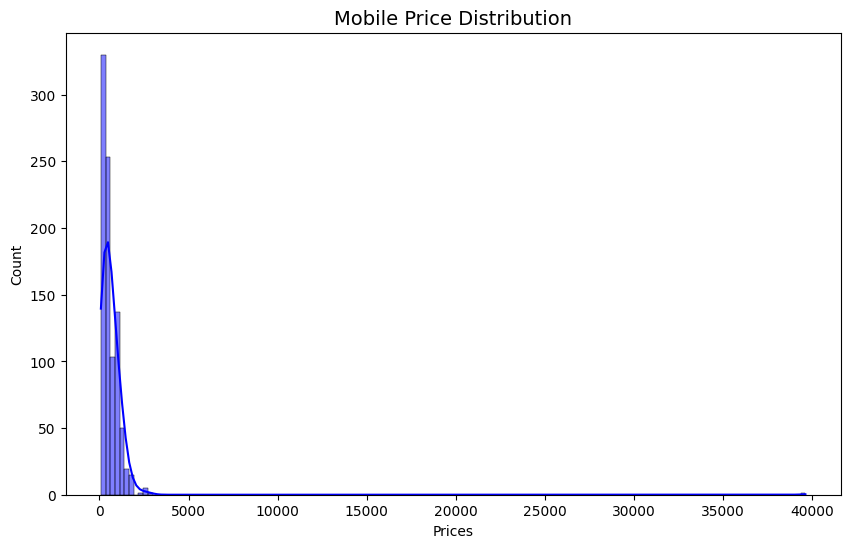

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df["Launched Price (USA)"], bins=150, kde=True, color='blue')
plt.title("Mobile Price Distribution", fontsize=14)
plt.xlabel("Prices")
plt.ylabel("Count")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9824\1896747792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")


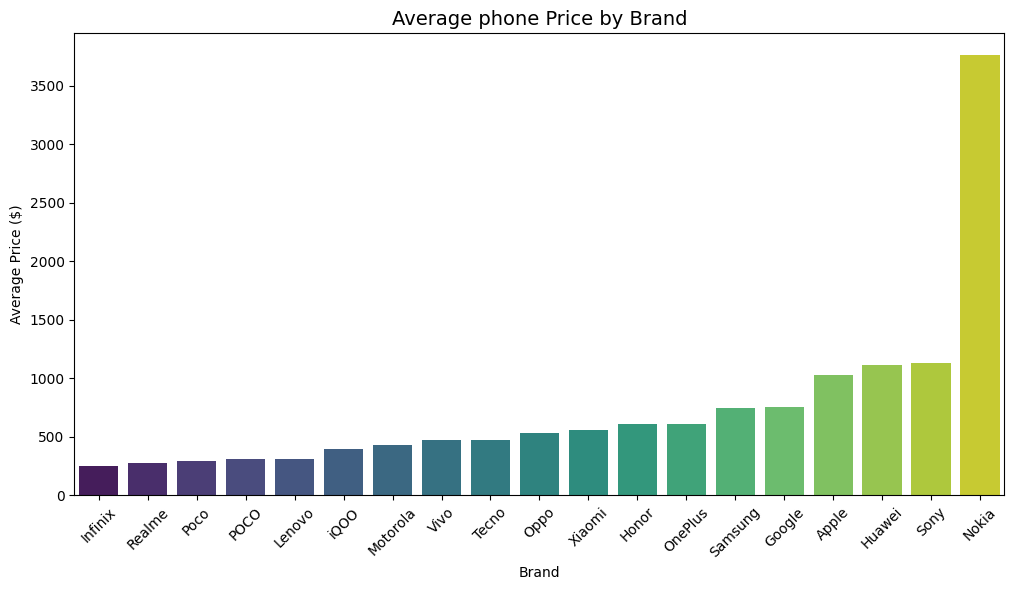

In [16]:
plt.figure(figsize=(12, 6))
brand_avg_price = df.groupby("Company Name")["Launched Price (USA)"].mean().sort_values().tail(20)
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average phone Price by Brand", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Average Price ($)")
plt.show()

In [17]:
df[(df["Company Name"]=="Nokia")&(df["Model Name"]=="T21")]

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
685,Nokia,T21,466,4,8,8,Unisoc T612,8200,10,39622,2022


In [18]:
nokia_prices = df[df["Company Name"] == "Nokia"]["Launched Price (USA)"]

reasonable_nokia_prices = nokia_prices[nokia_prices < 10000]  
nokia_mean_price = reasonable_nokia_prices.mean()

df.loc[(df["Company Name"] == "Nokia") & (df["Model Name"] == "T21"), "Launched Price (USA)"] = nokia_mean_price

C:\Users\DELL\AppData\Local\Temp\ipykernel_9824\1896747792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")


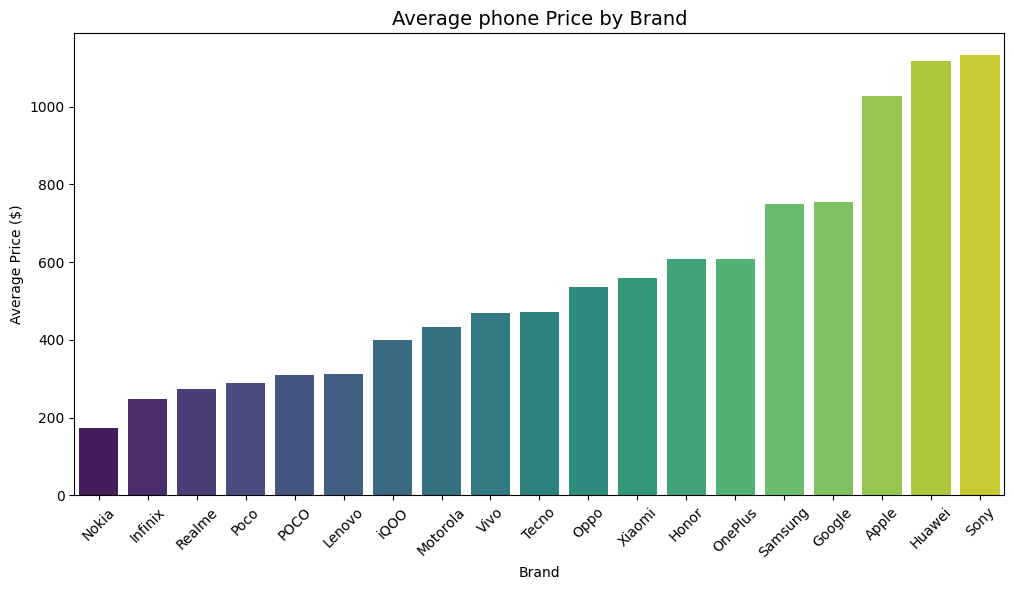

In [19]:
plt.figure(figsize=(12, 6))
brand_avg_price = df.groupby("Company Name")["Launched Price (USA)"].mean().sort_values().tail(20)
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average phone Price by Brand", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Average Price ($)")
plt.show()

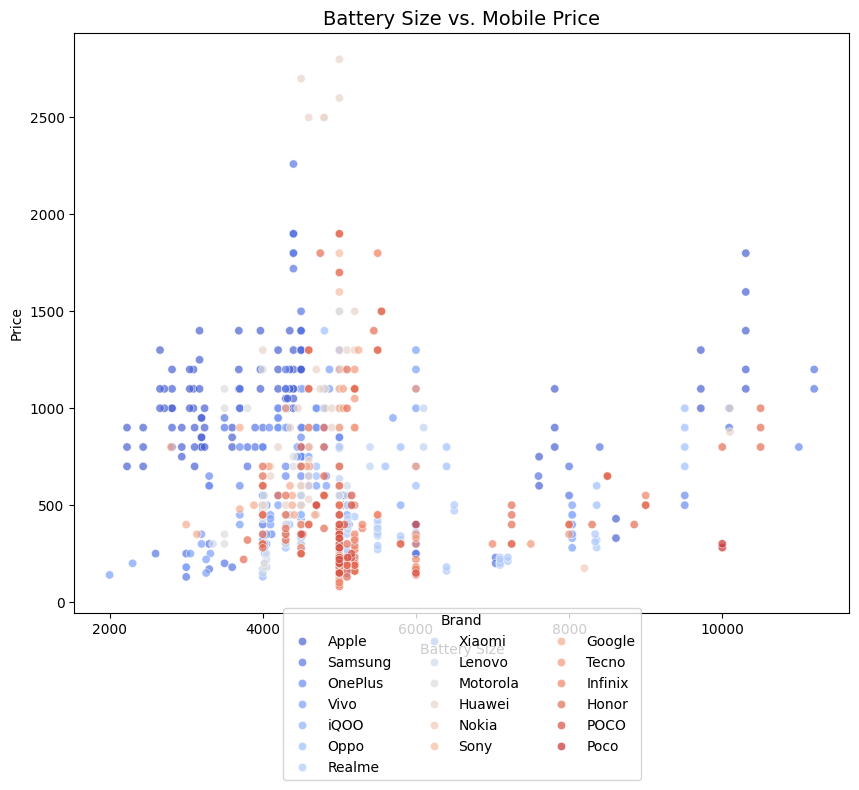

In [20]:
# top_brands = df['Company Name'].value_counts().head(10).index
# filtered_data = df[df['Company Name'].isin(top_brands)]
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=df["Battery Capacity"],
    y=df["Launched Price (USA)"],
    hue=df["Company Name"],
    palette="coolwarm",
    alpha=0.7
)
plt.title("Battery Size vs. Mobile Price", fontsize=14)
plt.xlabel("Battery Size")
plt.ylabel("Price")
plt.legend(title="Brand", loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.subplots_adjust(bottom=0.3) 
plt.show()

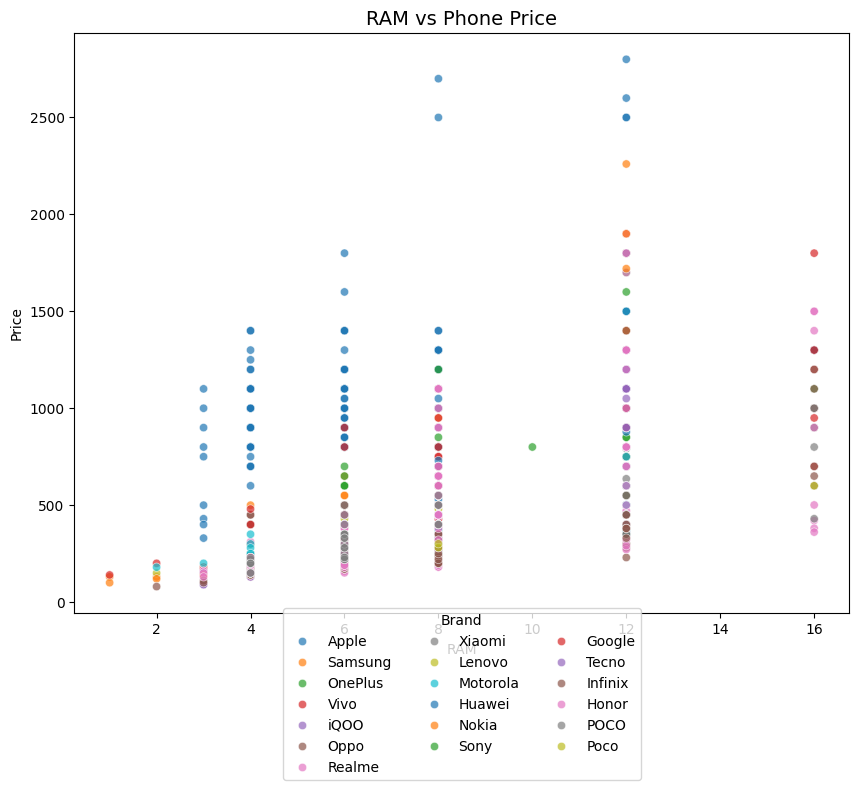

In [21]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df["RAM"], y=df["Launched Price (USA)"], hue=df["Company Name"], palette="tab10", alpha=0.7)
plt.title("RAM vs Phone Price", fontsize=14)
plt.xlabel("RAM")
plt.ylabel("Price")
plt.legend(title="Brand", loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.subplots_adjust(bottom=0.3) 
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9824\780386021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")


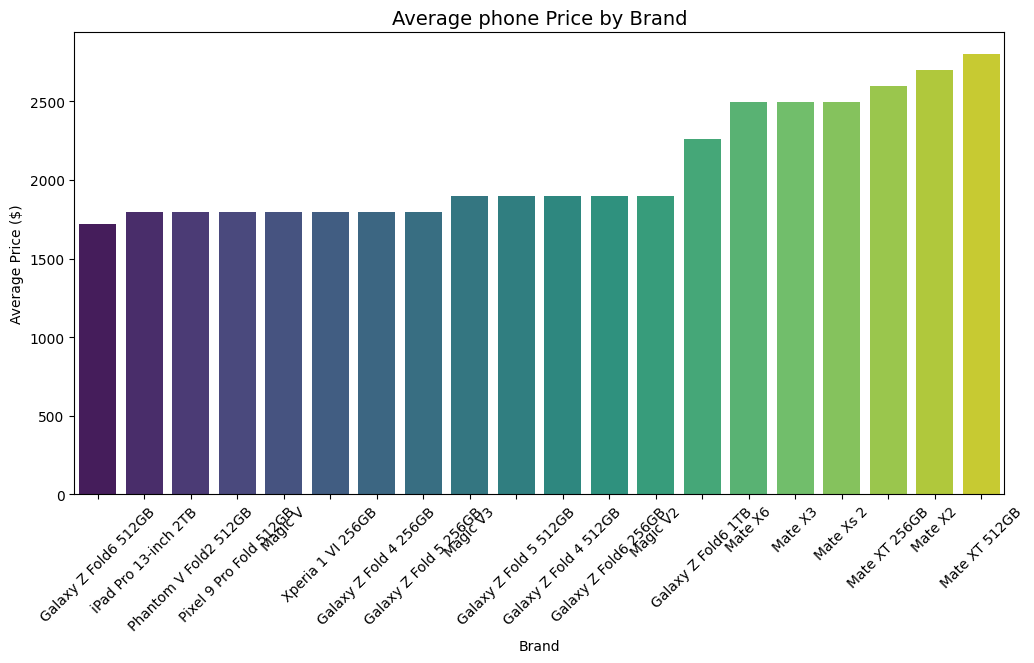

In [22]:
plt.figure(figsize=(12, 6))
brand_avg_price = df.groupby("Model Name")["Launched Price (USA)"].mean().sort_values().tail(20)
sns.barplot(x=brand_avg_price.index, y=brand_avg_price.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average phone Price by Brand", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Average Price ($)")
plt.show()

In [23]:
la=LabelEncoder()
for i in range(0,object.shape[1]):
    object.iloc[:,i]=la.fit_transform(object.iloc[:,i])

df=pd.concat([object,numric],axis=1)
df.head()

,Company Name,Model Name,Processor,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0,884,7,174,6,12,48,3600,6,799,2024
1,0,885,7,174,6,12,48,3600,6,849,2024
2,0,886,7,174,6,12,48,3600,6,899,2024
3,0,887,7,203,6,12,48,4200,7,899,2024
4,0,888,7,203,6,12,48,4200,7,949,2024


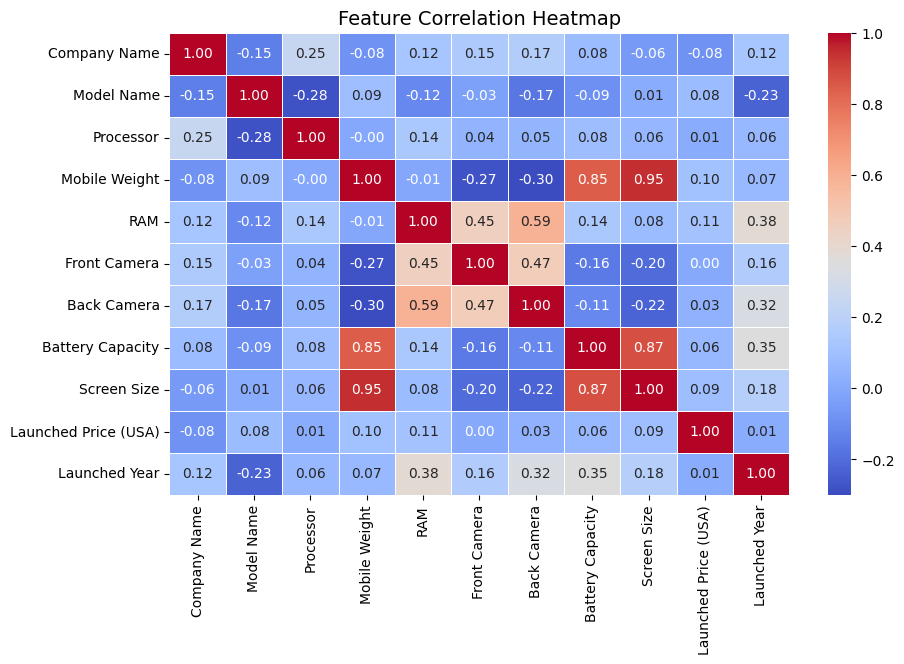

In [24]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()

In [25]:
df = df.reset_index(drop=True)
df.head()

,Company Name,Model Name,Processor,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,0,884,7,174,6,12,48,3600,6,799,2024
1,0,885,7,174,6,12,48,3600,6,849,2024
2,0,886,7,174,6,12,48,3600,6,899,2024
3,0,887,7,203,6,12,48,4200,7,899,2024
4,0,888,7,203,6,12,48,4200,7,949,2024


In [26]:
df=df.drop(["Company Name","Model Name","Launched Year"],axis=1)
df.head()

,Processor,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA)
0,7,174,6,12,48,3600,6,799
1,7,174,6,12,48,3600,6,849
2,7,174,6,12,48,3600,6,899
3,7,203,6,12,48,4200,7,899
4,7,203,6,12,48,4200,7,949


In [27]:
X = df.drop(['Launched Price (USA)'],axis=1)  
y = df['Launched Price (USA)']

In [28]:
important_features = ['Battery Capacity', 'Processor', 'RAM', 'Back Camera', 'Front Camera']
X = df[important_features]
y = df['Launched Price (USA)']

In [29]:
X['Battery Life'] = X['Battery Capacity'] / df['Mobile Weight']
X['Total Camera Quality'] = X['Back Camera'] + X['Front Camera']

C:\Users\DELL\AppData\Local\Temp\ipykernel_9824\3991761596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Battery Life'] = X['Battery Capacity'] / df['Mobile Weight']
C:\Users\DELL\AppData\Local\Temp\ipykernel_9824\3991761596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Total Camera Quality'] = X['Back Camera'] + X['Front Camera']


In [30]:
from sklearn.utils import resample

X = df[important_features]
y = df['Launched Price (USA)']


# Data Augmentation: Bootstrapping
n_samples = 5000  # Number of synthetic samples
X_augmented, y_augmented = resample(X, y, n_samples=n_samples, random_state=42)

# Add noise to the augmented data
noise_level = 0.01  # Adjust as needed
X_augmented = X_augmented + np.random.normal(0, noise_level, size=X_augmented.shape)

# Combine original and augmented data
X_combined = pd.concat([X, X_augmented], axis=0)
y_combined = pd.concat([y, y_augmented], axis=0)

# Shuffle the combined dataset
combined_data = pd.concat([X_combined, y_combined], axis=1)
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split back into X and y
X_combined = combined_data.drop(columns=['Launched Price (USA)'])
y_combined = combined_data['Launched Price (USA)']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_combined,y_combined, test_size=0.2, random_state=42)

In [44]:
algorithm=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','SVR']
RMSE=[]
R2=[]

In [45]:
def models(model):
    fit=model.fit(X_train,y_train)
    pre=model.predict(X_test)
    score=model.score(X_test,y_test)
    r2=r2_score(y_test,pre)
    mse=np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(mse)
    print(f"THE SCORE IS : {score}")

In [ ]:
model1=LinearRegression()
model2=DecisionTreeRegressor()
model3=RandomForestRegressor()
model4=GradientBoostingRegressor()
model5=SVR()


In [47]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)



THE SCORE IS : 0.019349714202277823
THE SCORE IS : 0.9900484327097554
THE SCORE IS : 0.875716578597034
THE SCORE IS : 0.9823812118052695
THE SCORE IS : -0.021442919572606245


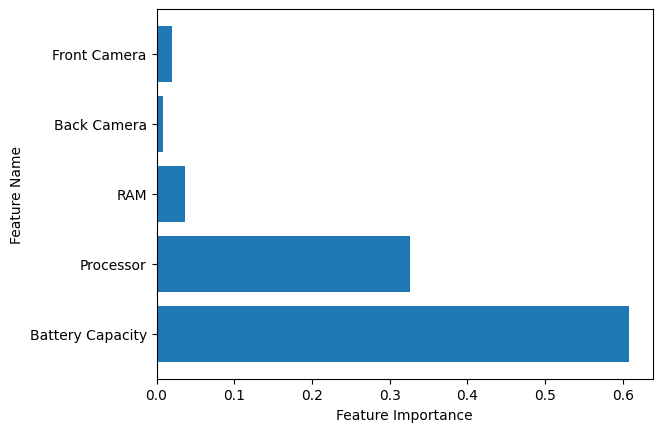

In [36]:
best_rf = RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)
best_rf.fit(X_train, y_train)

# Plot feature importance
importances = best_rf.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.show()

In [48]:
import joblib
from xgboost import XGBRegressor


best_model = DecisionTreeRegressor()
best_model.fit(X_train, y_train)


joblib.dump(best_model, "DTR_best_model.pkl")
print("Model saved as DTR_best_model.pkl")

Model saved as DTR_best_model.pkl


In [49]:
import pickle
file_name='mobile_predictions5.sav'
pickle.dump(model2,open(file_name,'wb'))